In [1]:
from bias_correction import XBiasCorrection
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
obs_data = np.random.randn(2*365, 34, 65)
model_data = np.random.randn(2*365, 34, 65)
sce_data = np.random.randn(365, 34, 65)

lat = range(34)
lon = range(65)

obs_data = xr.DataArray(obs_data, dims=['time','lat','lon'], \
                        coords=[pd.date_range('2010-01-01', '2011-12-31', freq='D'), lat, lon])
model_data = xr.DataArray(model_data, dims=['time','lat','lon'], \
                          coords=[pd.date_range('2010-01-01', '2011-12-31', freq='D'), lat, lon])
sce_data = xr.DataArray(sce_data, dims=['time','lat','lon'], \
                        coords=[pd.date_range('2019-01-01', '2019-12-31', freq='D'), lat, lon])

# combining dataarrays to form dataset with same timelength otherwise correction will give error
ds = xr.Dataset({'model_data':model_data,'obs_data':obs_data, 'sce_data':sce_data})
ds['sce_data']

<xarray.DataArray 'sce_data' (time: 1095, lat: 34, lon: 65)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       ...,

       [[-0.09518566,  0.05560122, -1.01084593, ..., -0.72676047,
         -0.63797701,  1.16934549],
        [ 0.06065947, -0.4140709 , -0.16607472, ..., -0.12381803,
          1.21979467, -0.42269348],
        [-0.24307992, -1.31741921,  0.80206   , ...,  0.4259745 ,
          0.50403007,  0.04768382],
        ...,
        [-1.98505369,  0.50282244,  0.75052162, ..., -1.80168179,
          1.06391018, -1.26439076],
        [-0.79469455, -0.69299135,  2.18347273, ...,  1.58918943,
         -0.11614894, -0.07572951],
        [-1.81505656,  0.19980816, -0.7944789 , ..., -0.88497941,
         -0.1399229 , -0.63024451]],

       [[ 1.14202908,  0.35434   , -0.35897194, ..., -0.11078768,
         -1.50658864, -1.08600353],
        [-1.85907168,  0.00764135,  0.50626561, ...,  1.78461881,
          0.88746401,  0.12029927],
        [-1.03902628, -0.05005897,  0.94987294, ..., -0.85613664,
         -0.45612441,  0.48597345],
        ...,
        [-0.5850097 ,  0.46484263, -1.6648973 , ..., -1.3629381 ,
         -1.41010823,  0.10307265],
        [ 1.0651863 , -1.08398362,  1.20518992, ...,  0.65304497,
         -1.93728383,  0.050775  ],
        [ 0.2294315 ,  0.64831578, -0.65526038, ...,  1.15314773,
          0.13197302,  1.47201523]],

       [[-0.94736871, -1.11935817, -1.48881056, ...,  0.11260447,
         -0.97933785, -0.92099154],
        [-0.61388366,  0.51535435, -0.8424743 , ..., -0.40044379,
         -0.82195486,  0.30008049],
        [-0.08522707,  1.40524713, -0.41585439, ...,  3.25924408,
          0.92043351,  1.31743337],
        ...,
        [ 0.55402671, -0.72048639, -1.1898347 , ...,  0.36996221,
          0.23495775, -1.00098817],
        [ 0.82545941,  1.21317365,  0.08903016, ..., -2.12925755,
         -0.61850682, -1.31054359],
        [ 0.08143252,  2.23089464, -1.10409237, ...,  0.77455715,
         -0.96956363,  0.50970884]]])
Coordinates:
  * time     (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2019-12-31
  * lat      (lat) int64 0 1 2 3 4 5 6 7 8 9 ... 24 25 26 27 28 29 30 31 32 33


In [3]:
bc = XBiasCorrection(ds['obs_data'], ds['model_data'], ds['sce_data'])
# df1 = bc.correct(method='modified_quantile')
# df2 = bc.correct(method='basic_quantile')
df3 = bc.correct(method='gamma_mapping')

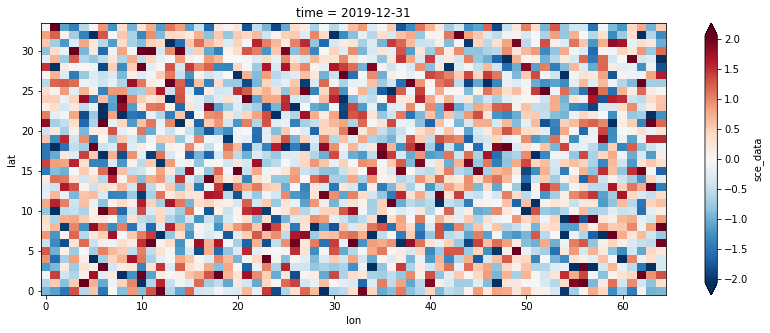

In [4]:
bc.sce_data.sel(time='2019-12-31').plot(figsize=(14, 5), robust=True)
plt.show()

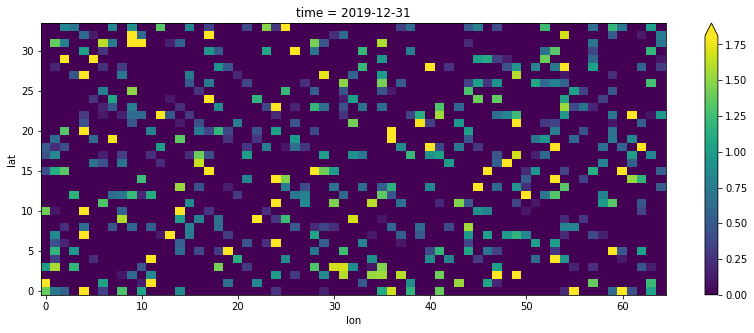

In [5]:
df3.sel(time='2019-12-31').plot(figsize=(14, 5), robust=True)
plt.show()